In [1]:
import numpy as np
import pandas as pd
import scipy
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

%matplotlib inline
#warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
colors = sns.color_palette('deep', 8)
sns.set_palette(colors)

In [2]:
df_orig = pd.read_json('../datasets/df.json', orient='split')
print(df_orig.info())
#df_orig.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2981 entries, 0 to 2980
Data columns (total 16 columns):
date              2981 non-null datetime64[ns]
eth_open          1134 non-null float64
eth_high          1134 non-null float64
eth_low           1134 non-null float64
eth_close         1134 non-null float64
eth_volumefrom    1134 non-null float64
eth_volumeto      1134 non-null float64
btc               2981 non-null float64
xrp               1332 non-null float64
eos               442 non-null float64
ltc               1786 non-null float64
xlm               605 non-null float64
xmr               1324 non-null float64
vixcls            2981 non-null float64
twexb             2981 non-null float64
effr              2981 non-null float64
dtypes: datetime64[ns](1), float64(15)
memory usage: 395.9 KB
None


In [3]:
# set df for time series
ts = pd.DataFrame()
ts['ds'] = df_orig.date
ts['y'] = df_orig.eth_close
ts = ts[ts.y.isnull().sum():].reset_index(drop=True)
ts.head(3)

,ds,y
0,2015-08-06,3.0
1,2015-08-07,1.2
2,2015-08-08,1.2


In [11]:
ts_train = ts[:-30]
ts_test = ts[-30:]

m = Prophet(interval_width=0.95)
m.fit(ts_train)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [12]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1129,2018-09-08,330.282734,192.895049,472.347203
1130,2018-09-09,324.898942,178.278153,470.491535
1131,2018-09-10,320.870258,193.588419,455.756673
1132,2018-09-11,315.550644,182.132012,445.377030
1133,2018-09-12,310.019159,173.507977,446.195815


In [18]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(ts_test.y, forecast.yhat[-30:]))
print(rmse)

101.42503375729773


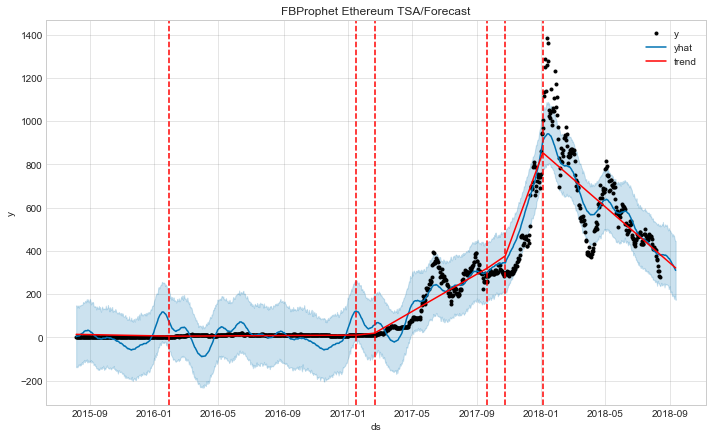

RMSE 30 day forecast: 101.42503


In [27]:
from fbprophet.plot import add_changepoints_to_plot
fig_cpts = m.plot(forecast)
a = add_changepoints_to_plot(fig_cpts.gca(), m, forecast)
plt.title("FBProphet Ethereum TSA/Forecast")
plt.legend()

plt.show()
print("RMSE 30 day forecast: {:.5f}".format(rmse))

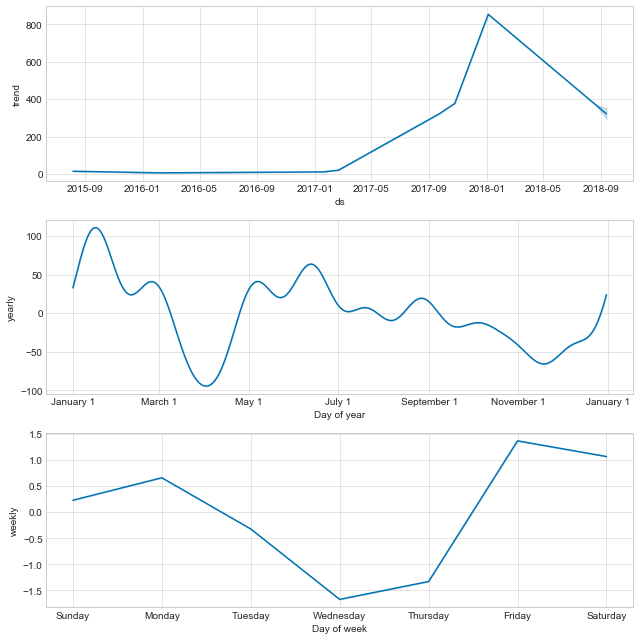

In [24]:
fig_components = m.plot_components(forecast)